In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_loan = pd.read_csv('/content/loan_approval_dataset_updated.csv',delimiter = ';', encoding='latin-1')
df_loan

loan_id   no_of_dependents    City      education  self_employed  \
0           1                  2  Ankara       Graduate             No   
1           2                  0  Ankara   Not Graduate            Yes   
2           3                  3  Ankara       Graduate             No   
3           4                  3  Ankara       Graduate             No   
4           5                  5  Ankara   Not Graduate            Yes   
...       ...                ...     ...            ...            ...   
4264     4265                  5   Ýzmir       Graduate            Yes   
4265     4266                  0   Ýzmir   Not Graduate            Yes   
4266     4267                  2   Ýzmir   Not Graduate             No   
4267     4268                  1   Ýzmir   Not Graduate             No   
4268     4269                  1   Ýzmir       Graduate             No   

       income_annum   loan_amount   loan_term   cibil_score  \
0           9600000      29900000          12         778.0   
1           4100000      12200000           8         417.0   
2           9100000      29700000          20           NaN   
3           8200000      30700000           8           NaN   
4           9800000      24200000          20           NaN   
...             ...           ...         ...           ...   
4264        1000000       2300000          12         317.0   
4265        3300000      11300000          20         559.0   
4266        6500000      23900000          18         457.0   
4267        4100000      12800000           8         780.0   
4268        9200000      29700000          10         607.0   

       residential_assets_value   commercial_assets_value  \
0                     2400000.0                  17600000   
1                     2700000.0                   2200000   
2                     7100000.0                   4500000   
3                    18200000.0                   3300000   
4                    12400000.0                   8200000   
...                         ...                       ...   
4264                  2800000.0                    500000   
4265                  4200000.0                   2900000   
4266                  1200000.0                  12400000   
4267                  8200000.0                    700000   
4268                 17800000.0                  11800000   

       luxury_assets_value   bank_asset_value  loan_status  
0                 22700000            8000000     Approved  
1                  8800000            3300000     Rejected  
2                 33300000           12800000     Rejected  
3                 23300000            7900000     Rejected  
4                 29400000            5000000     Rejected  
...                    ...                ...          ...  
4264               3300000             800000     Rejected  
4265              11000000            1900000     Approved  
4266              18100000            7300000     Rejected  
4267              14100000            5800000     Approved  
4268              35700000           12000000     Approved  

[4269 rows x 14 columns]

In [3]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    4269 non-null   int64  
 1    no_of_dependents          4269 non-null   int64  
 2   City                       4113 non-null   object 
 3    education                 4184 non-null   object 
 4    self_employed             4269 non-null   object 
 5    income_annum              4269 non-null   int64  
 6    loan_amount               4269 non-null   int64  
 7    loan_term                 4269 non-null   int64  
 8    cibil_score               3885 non-null   float64
 9    residential_assets_value  4146 non-null   float64
 10   commercial_assets_value   4269 non-null   int64  
 11   luxury_assets_value       4269 non-null   int64  
 12   bank_asset_value          4269 non-null   int64  
 13   loan_status               4269 non-null   objec

In [4]:
df_loan.isnull().sum()

loan_id                        0
 no_of_dependents              0
City                         156
 education                    85
 self_employed                 0
 income_annum                  0
 loan_amount                   0
 loan_term                     0
 cibil_score                 384
 residential_assets_value    123
 commercial_assets_value       0
 luxury_assets_value           0
 bank_asset_value              0
 loan_status                   0
dtype: int64

In [5]:
df_loan.columns = df_loan.columns.str.replace(' ', '')
df_loan['cibil_score'].fillna(df_loan['cibil_score'].median(), inplace=True)
df_loan['residential_assets_value'].fillna(df_loan['residential_assets_value'].median(), inplace=True)
df_loan['City'].fillna(df_loan['City'].mode()[0], inplace=True)
df_loan['education'].fillna(df_loan['education'].mode()[0], inplace=True)
df_loan

loan_id  no_of_dependents    City      education self_employed  \
0           1                 2  Ankara       Graduate            No   
1           2                 0  Ankara   Not Graduate           Yes   
2           3                 3  Ankara       Graduate            No   
3           4                 3  Ankara       Graduate            No   
4           5                 5  Ankara   Not Graduate           Yes   
...       ...               ...     ...            ...           ...   
4264     4265                 5   Ýzmir       Graduate           Yes   
4265     4266                 0   Ýzmir   Not Graduate           Yes   
4266     4267                 2   Ýzmir   Not Graduate            No   
4267     4268                 1   Ýzmir   Not Graduate            No   
4268     4269                 1   Ýzmir       Graduate            No   

      income_annum  loan_amount  loan_term  cibil_score  \
0          9600000     29900000         12        778.0   
1          4100000     12200000          8        417.0   
2          9100000     29700000         20        597.0   
3          8200000     30700000          8        597.0   
4          9800000     24200000         20        597.0   
...            ...          ...        ...          ...   
4264       1000000      2300000         12        317.0   
4265       3300000     11300000         20        559.0   
4266       6500000     23900000         18        457.0   
4267       4100000     12800000          8        780.0   
4268       9200000     29700000         10        607.0   

      residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                    2400000.0                 17600000             22700000   
1                    2700000.0                  2200000              8800000   
2                    7100000.0                  4500000             33300000   
3                   18200000.0                  3300000             23300000   
4                   12400000.0                  8200000             29400000   
...                        ...                      ...                  ...   
4264                 2800000.0                   500000              3300000   
4265                 4200000.0                  2900000             11000000   
4266                 1200000.0                 12400000             18100000   
4267                 8200000.0                   700000             14100000   
4268                17800000.0                 11800000             35700000   

      bank_asset_value loan_status  
0              8000000    Approved  
1              3300000    Rejected  
2             12800000    Rejected  
3              7900000    Rejected  
4              5000000    Rejected  
...                ...         ...  
4264            800000    Rejected  
4265           1900000    Approved  
4266           7300000    Rejected  
4267           5800000    Approved  
4268          12000000    Approved  

[4269 rows x 14 columns]

In [6]:
df_loan.isnull().sum()

loan_id                     0
no_of_dependents            0
City                        0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [7]:
df_loan['City'].unique()

array(['Ankara', 'Ýstanbul', 'Ýzmir', 'Bursa', 'Erzurum'], dtype=object)

In [8]:
label_encoder = LabelEncoder()
df_loan['City'] =label_encoder.fit_transform(df_loan['City'].astype(str))
df_loan['education'] =label_encoder.fit_transform(df_loan['education'].astype(str))
df_loan['self_employed'] =label_encoder.fit_transform(df_loan['self_employed'])
df_loan['loan_status'] =label_encoder.fit_transform(df_loan['loan_status'])
df_loan

loan_id  no_of_dependents  City  education  self_employed  income_annum  \
0           1                 2     0          0              0       9600000   
1           2                 0     0          1              1       4100000   
2           3                 3     0          0              0       9100000   
3           4                 3     0          0              0       8200000   
4           5                 5     0          1              1       9800000   
...       ...               ...   ...        ...            ...           ...   
4264     4265                 5     4          0              1       1000000   
4265     4266                 0     4          1              1       3300000   
4266     4267                 2     4          1              0       6500000   
4267     4268                 1     4          1              0       4100000   
4268     4269                 1     4          0              0       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        29900000         12        778.0                 2400000.0   
1        12200000          8        417.0                 2700000.0   
2        29700000         20        597.0                 7100000.0   
3        30700000          8        597.0                18200000.0   
4        24200000         20        597.0                12400000.0   
...           ...        ...          ...                       ...   
4264      2300000         12        317.0                 2800000.0   
4265     11300000         20        559.0                 4200000.0   
4266     23900000         18        457.0                 1200000.0   
4267     12800000          8        780.0                 8200000.0   
4268     29700000         10        607.0                17800000.0   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
0                    17600000             22700000           8000000   
1                     2200000              8800000           3300000   
2                     4500000             33300000          12800000   
3                     3300000             23300000           7900000   
4                     8200000             29400000           5000000   
...                       ...                  ...               ...   
4264                   500000              3300000            800000   
4265                  2900000             11000000           1900000   
4266                 12400000             18100000           7300000   
4267                   700000             14100000           5800000   
4268                 11800000             35700000          12000000   

      loan_status  
0               0  
1               1  
2               1  
3               1  
4               1  
...           ...  
4264            1  
4265            0  
4266            1  
4267            0  
4268            0  

[4269 rows x 14 columns]

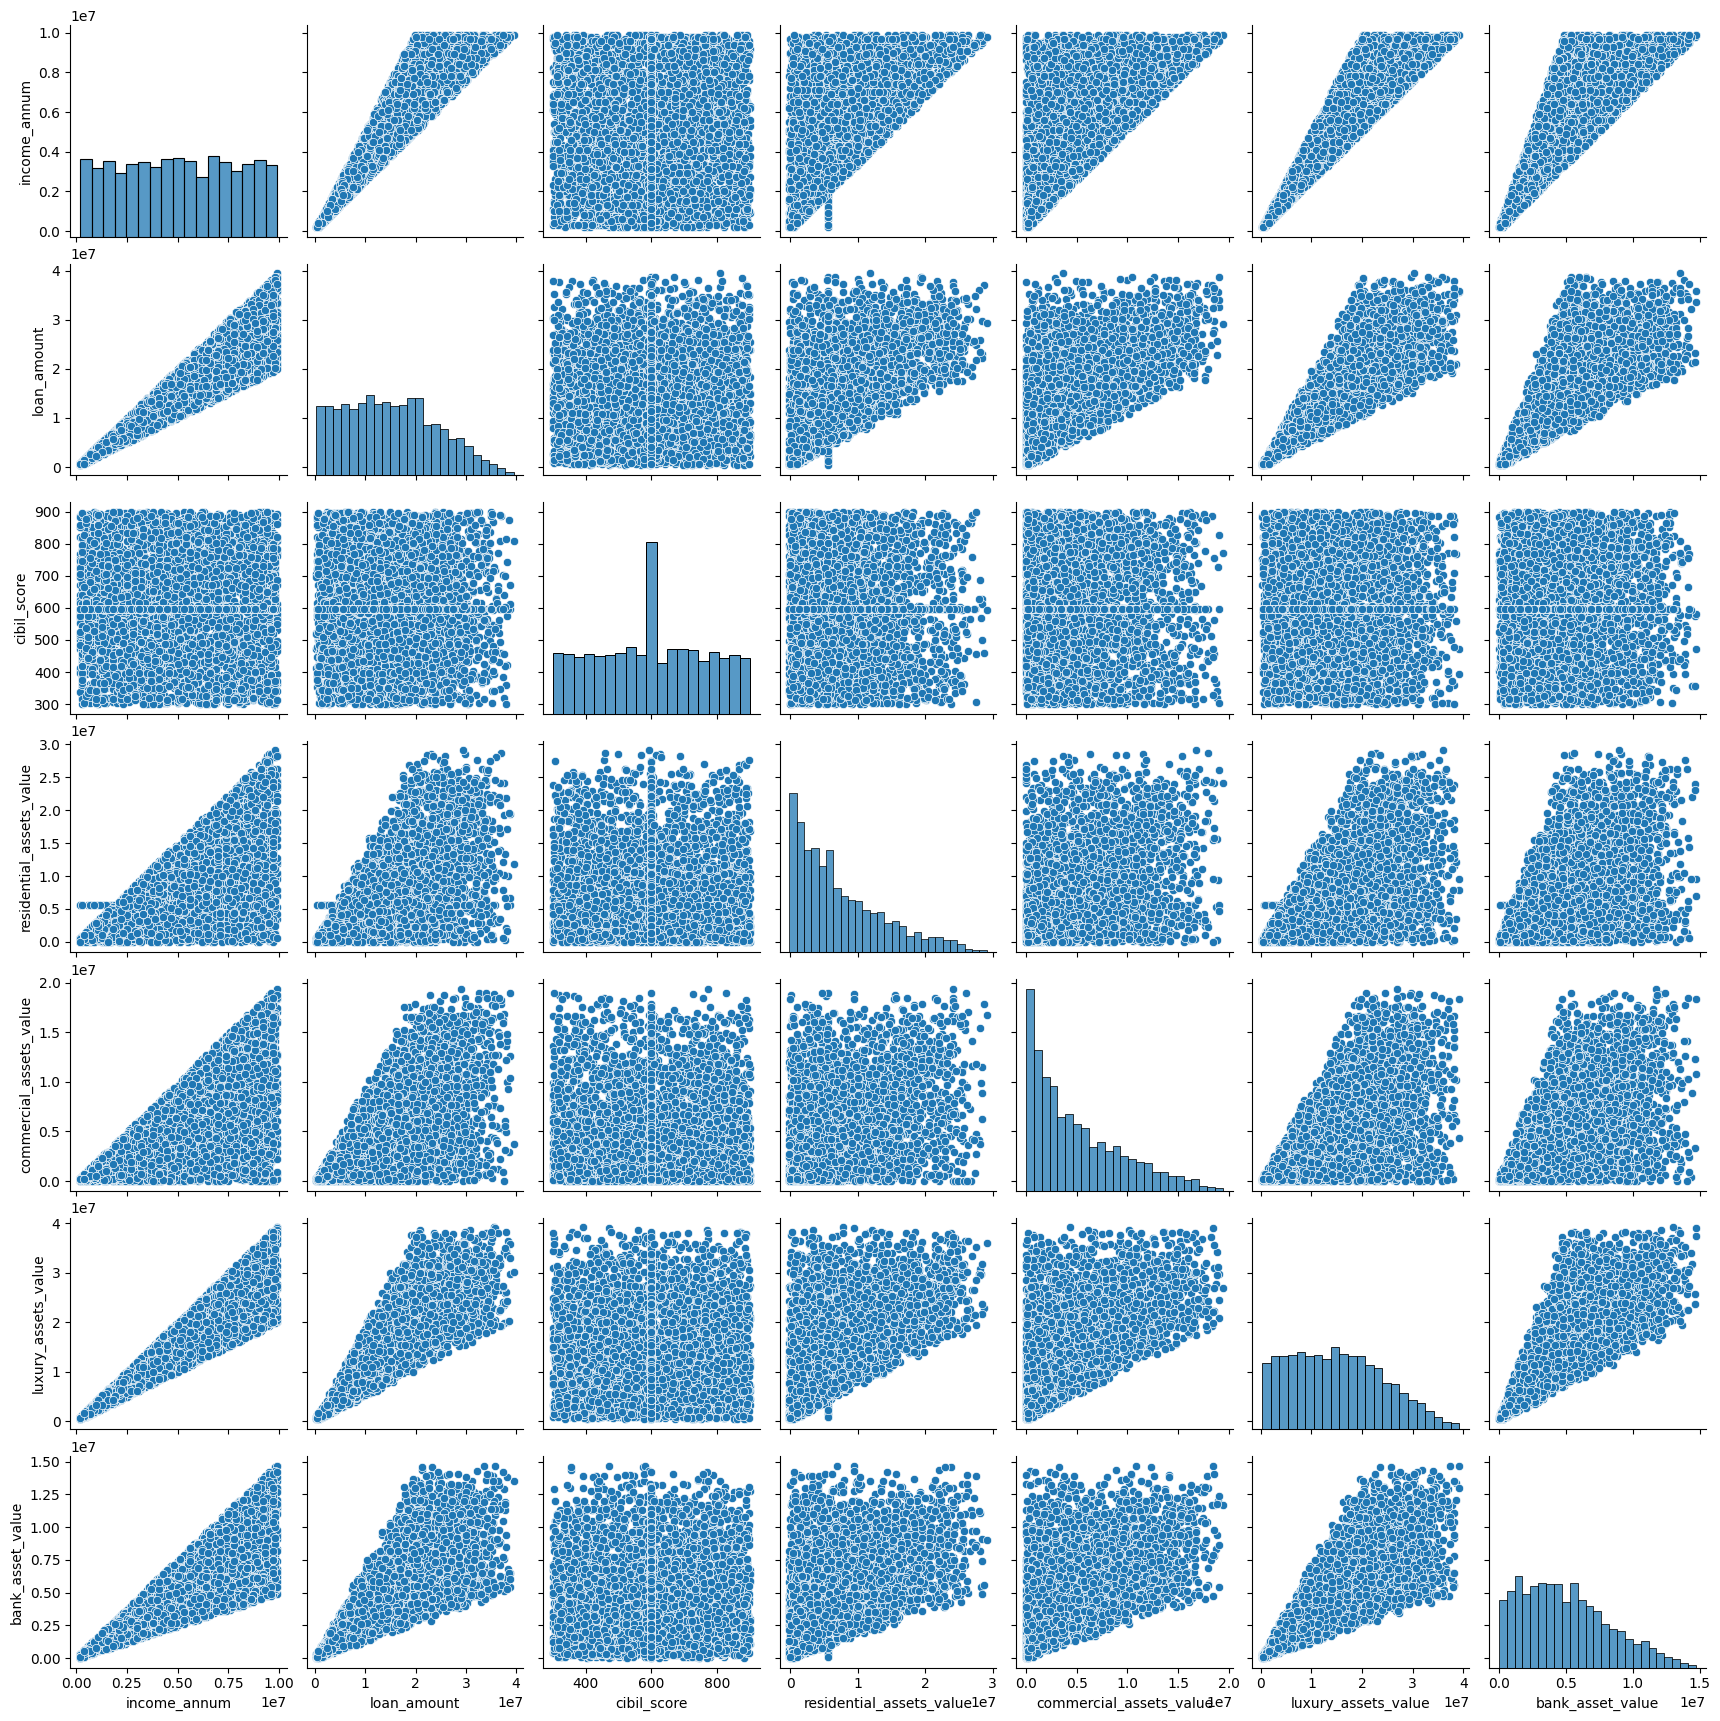

In [9]:
num = ['income_annum', 'loan_amount', 'cibil_score', 'residential_assets_value',
                   'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

pair_plot = sns.pairplot(df_loan[num])
plt.show()

In [10]:
df_loan_3 = df_loan.copy()

In [11]:
from scipy.stats import zscore


for col in ['income_annum', 'loan_amount', 'residential_assets_value',
               'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']:
    df_loan_3[col] = zscore(df_loan_3[col])

z_columns = [col for col in df_loan_3.columns if 'zscore' in col]
for col in z_columns:
    df_loan_3 = df_loan_3[np.abs(df_loan_3[col]) <= 3]

df_loan_3

loan_id  no_of_dependents  City  education  self_employed  income_annum  \
0           1                 2     0          0              0      1.617979   
1           2                 0     0          1              1     -0.341750   
2           3                 3     0          0              0      1.439822   
3           4                 3     0          0              0      1.119139   
4           5                 5     0          1              1      1.689242   
...       ...               ...   ...        ...            ...           ...   
4264     4265                 5     4          0              1     -1.446324   
4265     4266                 0     4          1              1     -0.626801   
4266     4267                 2     4          1              0      0.513405   
4267     4268                 1     4          1              0     -0.341750   
4268     4269                 1     4          0              0      1.475453   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        1.633052         12        778.0                 -0.783424   
1       -0.324414          8        417.0                 -0.736752   
2        1.610933         20        597.0                 -0.052233   
3        1.721525          8        597.0                  1.674623   
4        1.002681         20        597.0                  0.772302   
...           ...        ...          ...                       ...   
4264    -1.419268         12        317.0                 -0.721195   
4265    -0.423946         20        559.0                 -0.503394   
4266     0.969504         18        457.0                 -0.970111   
4267    -0.258059          8        780.0                  0.118897   
4268     1.610933         10        607.0                  1.612394   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
0                    2.877289             0.832028          0.930304   
1                   -0.631921            -0.694993         -0.515936   
2                   -0.107818             1.996520          2.407316   
3                   -0.381263             0.897943          0.899533   
4                    0.735304             1.568075          0.007172   
...                       ...                  ...               ...   
4264                -1.019301            -1.299210         -1.285213   
4265                -0.472412            -0.453306         -0.946732   
4266                 1.692361             0.326683          0.714907   
4267                -0.973727            -0.112748          0.253341   
4268                 1.555638             2.260178          2.161148   

      loan_status  
0               0  
1               1  
2               1  
3               1  
4               1  
...           ...  
4264            1  
4265            0  
4266            1  
4267            0  
4268            0  

[4269 rows x 14 columns]

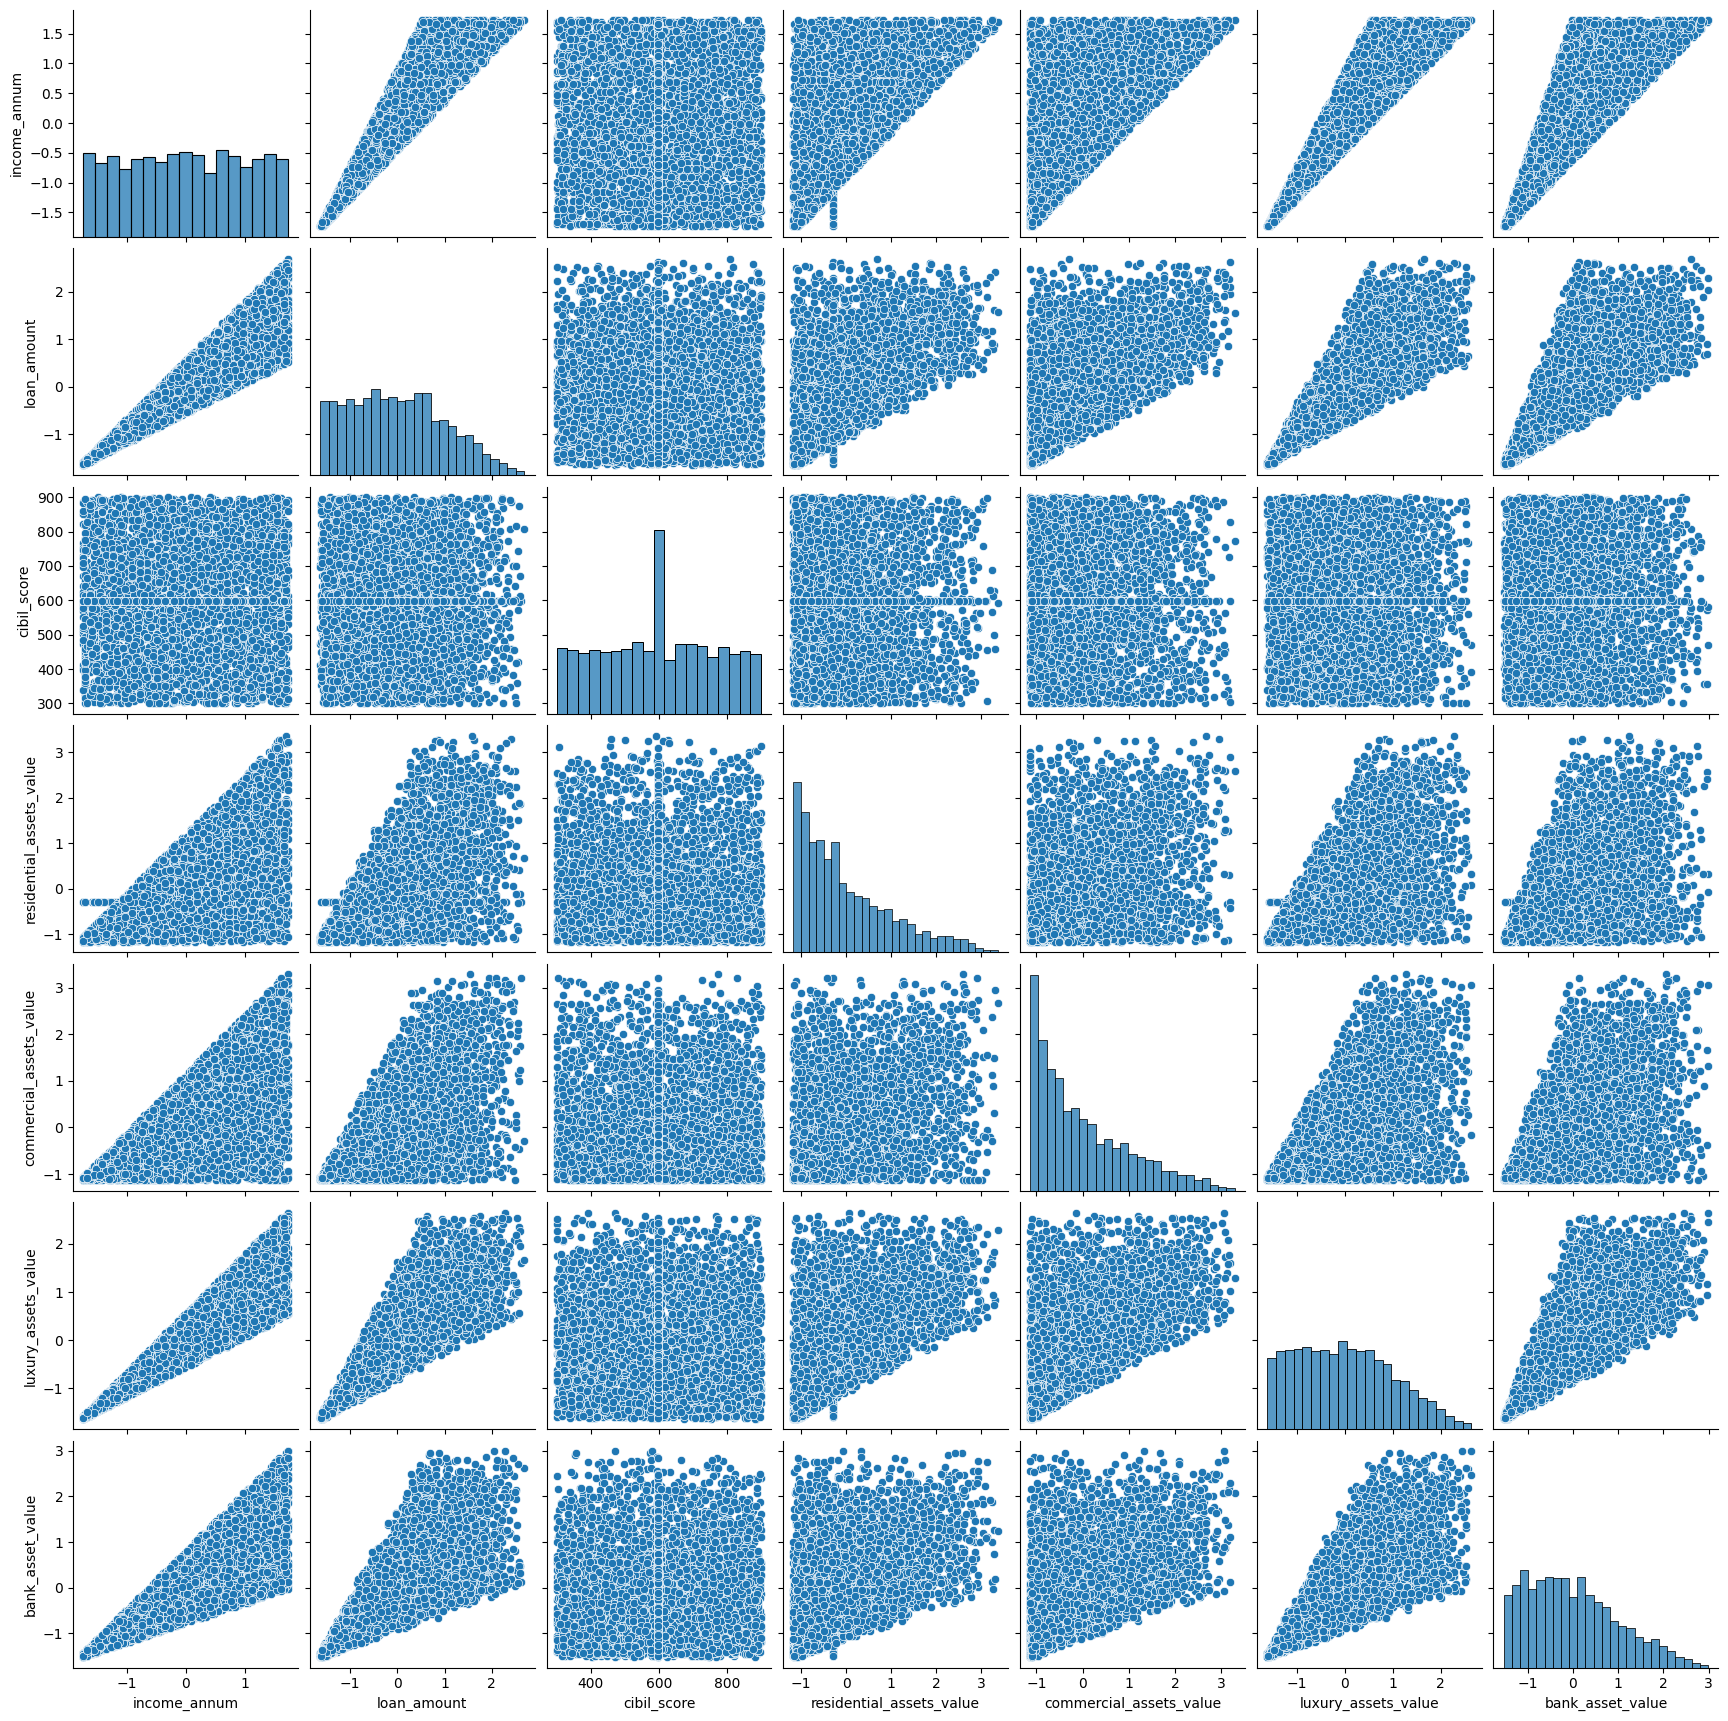

In [12]:
pair_plot = sns.pairplot(df_loan_3[num])
plt.show()

kolonlardaki büyük verileiri normalize etmeden önce aykırı bir değer olup olmadığına bakmak gerekliydi, bu veride bir etkisi olmadığından df_loan üzerinde min-max veya standardization ile devam edeceğiz

In [13]:
scaler_param = {}
for e in num:
  scaler_param[e] = {
      'min': df_loan[e].min(),
      'diff': df_loan[e].max() - df_loan[e].min()
  }
scaler_param

{'income_annum': {'min': 200000, 'diff': 9700000},
 'loan_amount': {'min': 300000, 'diff': 39200000},
 'cibil_score': {'min': 300.0, 'diff': 600.0},
 'residential_assets_value': {'min': -100000.0, 'diff': 29200000.0},
 'commercial_assets_value': {'min': 0, 'diff': 19400000},
 'luxury_assets_value': {'min': 300000, 'diff': 38900000},
 'bank_asset_value': {'min': 0, 'diff': 14700000}}

In [14]:
from sklearn.preprocessing import MinMaxScaler

df_loan[num] = MinMaxScaler().fit_transform(df_loan[num])
df_loan

loan_id  no_of_dependents  City  education  self_employed  income_annum  \
0           1                 2     0          0              0      0.969072   
1           2                 0     0          1              1      0.402062   
2           3                 3     0          0              0      0.917526   
3           4                 3     0          0              0      0.824742   
4           5                 5     0          1              1      0.989691   
...       ...               ...   ...        ...            ...           ...   
4264     4265                 5     4          0              1      0.082474   
4265     4266                 0     4          1              1      0.319588   
4266     4267                 2     4          1              0      0.649485   
4267     4268                 1     4          1              0      0.402062   
4268     4269                 1     4          0              0      0.927835   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        0.755102         12     0.796667                  0.085616   
1        0.303571          8     0.195000                  0.095890   
2        0.750000         20     0.495000                  0.246575   
3        0.775510          8     0.495000                  0.626712   
4        0.609694         20     0.495000                  0.428082   
...           ...        ...          ...                       ...   
4264     0.051020         12     0.028333                  0.099315   
4265     0.280612         20     0.431667                  0.147260   
4266     0.602041         18     0.261667                  0.044521   
4267     0.318878          8     0.800000                  0.284247   
4268     0.750000         10     0.511667                  0.613014   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
0                    0.907216             0.575835          0.544218   
1                    0.113402             0.218509          0.224490   
2                    0.231959             0.848329          0.870748   
3                    0.170103             0.591260          0.537415   
4                    0.422680             0.748072          0.340136   
...                       ...                  ...               ...   
4264                 0.025773             0.077121          0.054422   
4265                 0.149485             0.275064          0.129252   
4266                 0.639175             0.457584          0.496599   
4267                 0.036082             0.354756          0.394558   
4268                 0.608247             0.910026          0.816327   

      loan_status  
0               0  
1               1  
2               1  
3               1  
4               1  
...           ...  
4264            1  
4265            0  
4266            1  
4267            0  
4268            0  

[4269 rows x 14 columns]

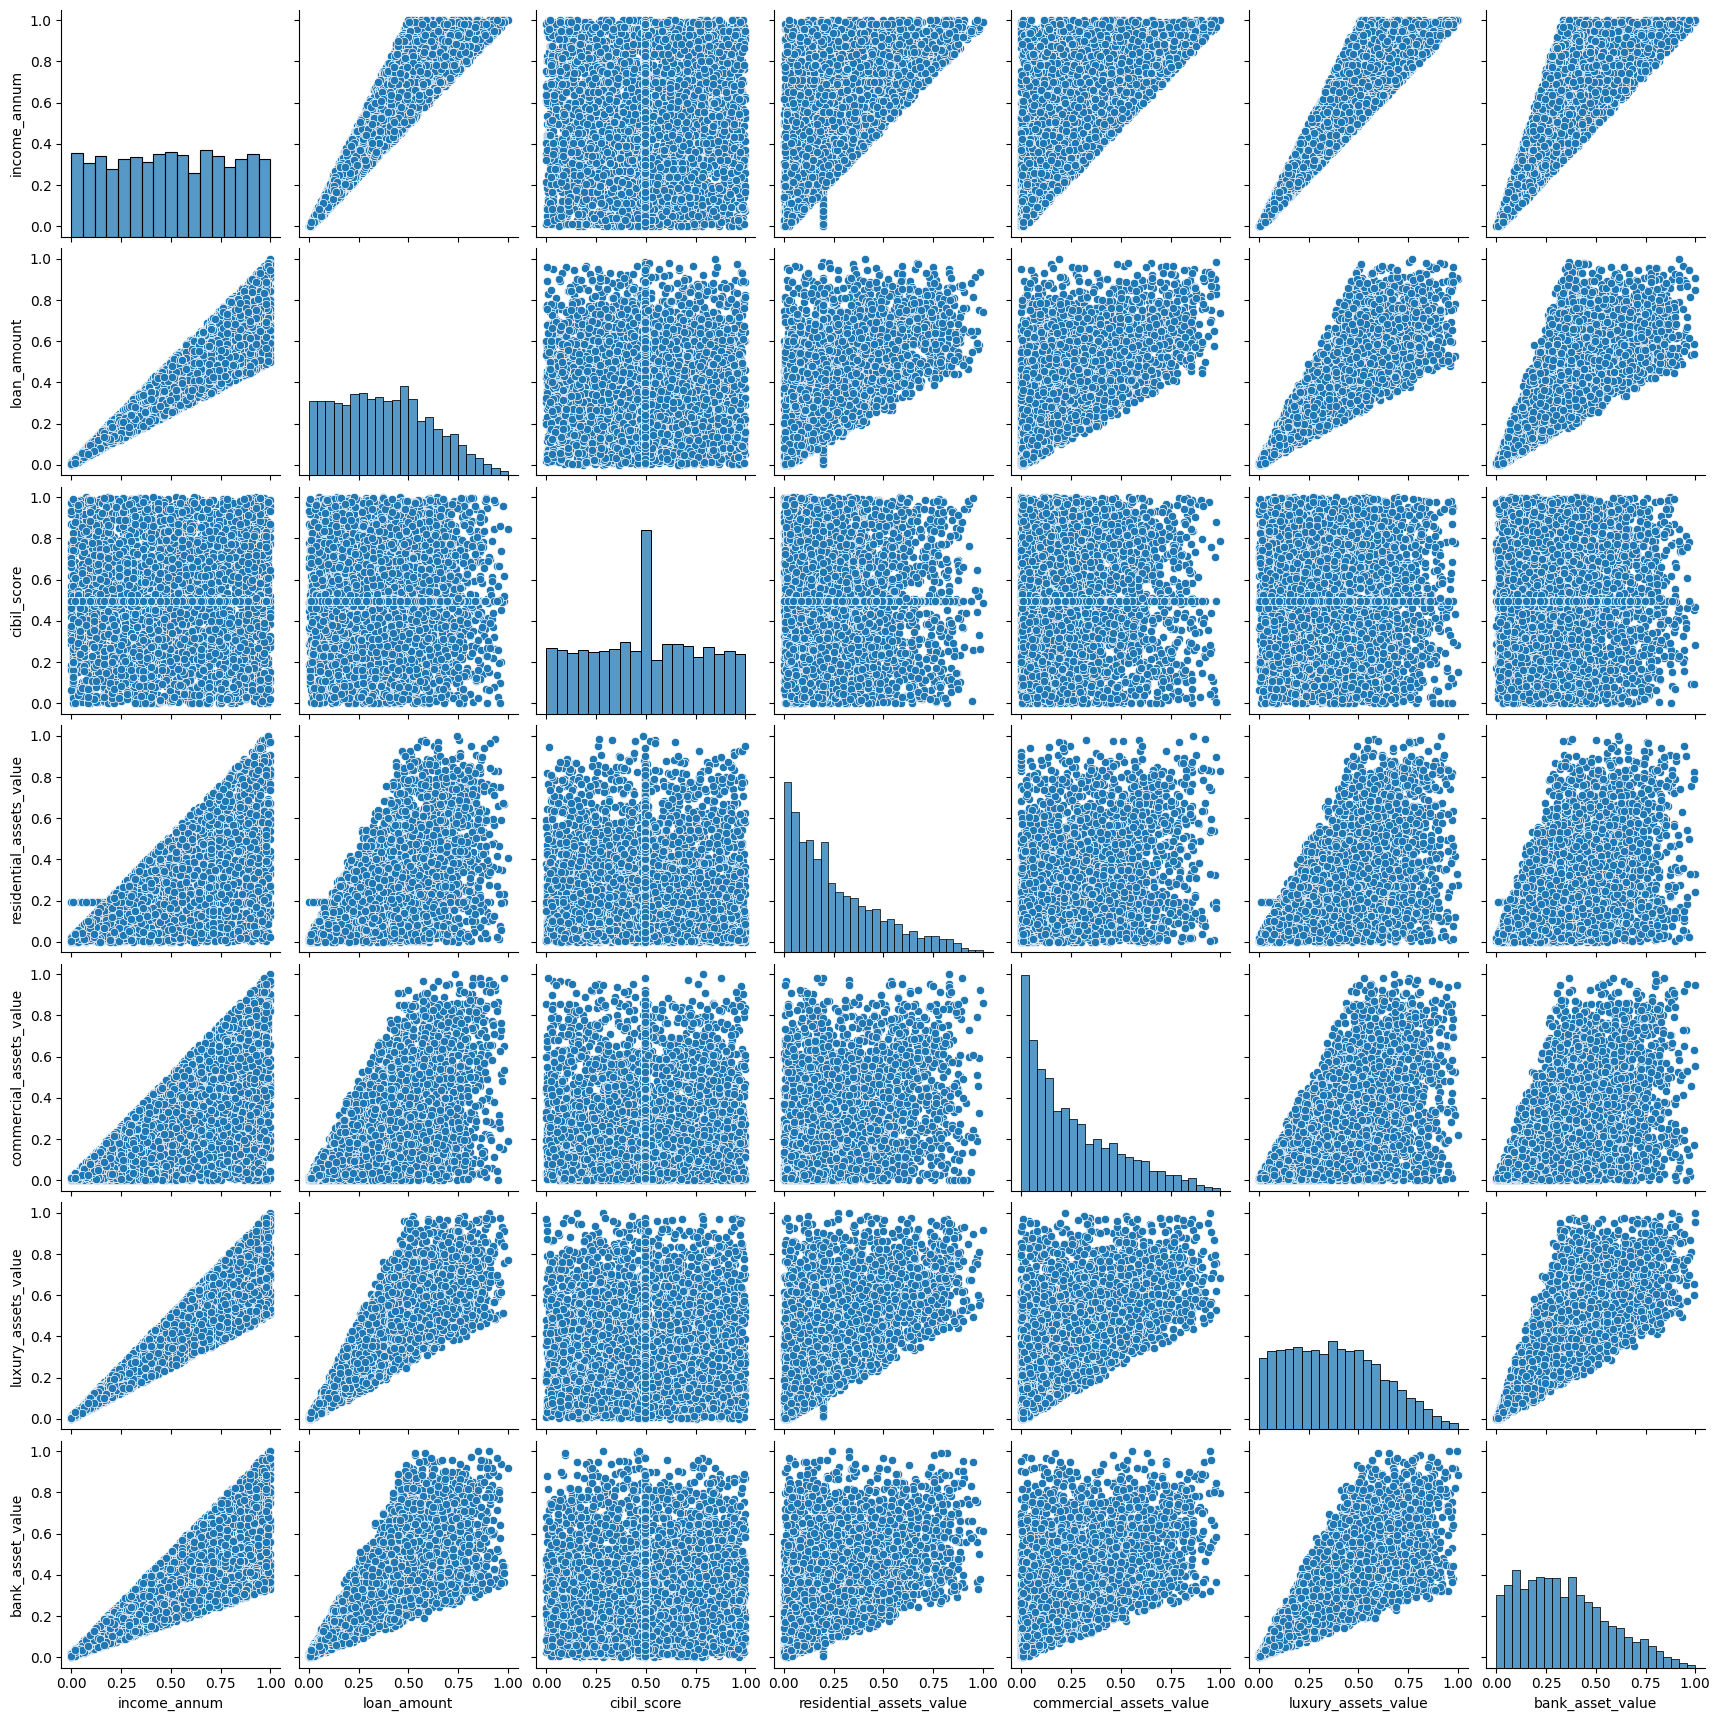

In [15]:
pair_plot = sns.pairplot(df_loan[num])
plt.show()

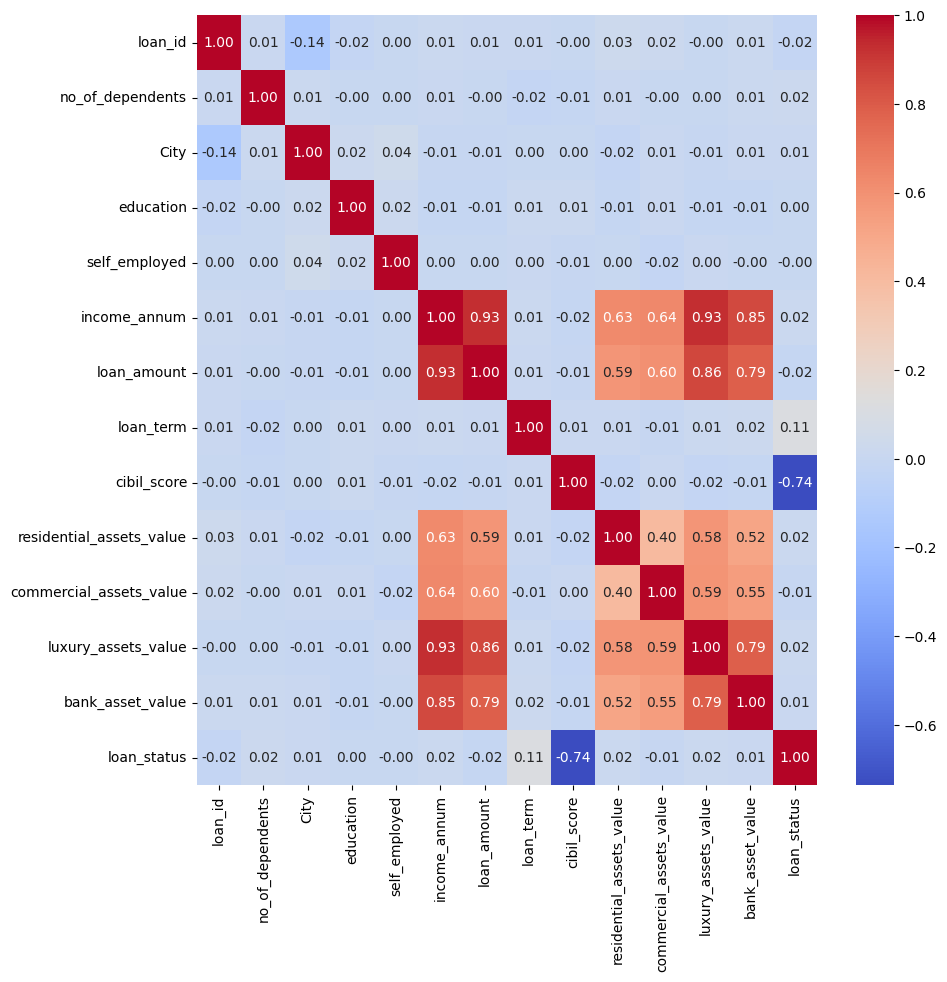

In [16]:
corr = df_loan.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

In [17]:
df_loan_4 = df_loan.drop(columns=['education', 'self_employed','loan_id'])

x_ = df_loan_4.drop('loan_status', axis=1)
y_ = df_loan_4['loan_status']

x_


no_of_dependents  City  income_annum  loan_amount  loan_term  \
0                    2     0      0.969072     0.755102         12   
1                    0     0      0.402062     0.303571          8   
2                    3     0      0.917526     0.750000         20   
3                    3     0      0.824742     0.775510          8   
4                    5     0      0.989691     0.609694         20   
...                ...   ...           ...          ...        ...   
4264                 5     4      0.082474     0.051020         12   
4265                 0     4      0.319588     0.280612         20   
4266                 2     4      0.649485     0.602041         18   
4267                 1     4      0.402062     0.318878          8   
4268                 1     4      0.927835     0.750000         10   

      cibil_score  residential_assets_value  commercial_assets_value  \
0        0.796667                  0.085616                 0.907216   
1        0.195000                  0.095890                 0.113402   
2        0.495000                  0.246575                 0.231959   
3        0.495000                  0.626712                 0.170103   
4        0.495000                  0.428082                 0.422680   
...           ...                       ...                      ...   
4264     0.028333                  0.099315                 0.025773   
4265     0.431667                  0.147260                 0.149485   
4266     0.261667                  0.044521                 0.639175   
4267     0.800000                  0.284247                 0.036082   
4268     0.511667                  0.613014                 0.608247   

      luxury_assets_value  bank_asset_value  
0                0.575835          0.544218  
1                0.218509          0.224490  
2                0.848329          0.870748  
3                0.591260          0.537415  
4                0.748072          0.340136  
...                   ...               ...  
4264             0.077121          0.054422  
4265             0.275064          0.129252  
4266             0.457584          0.496599  
4267             0.354756          0.394558  
4268             0.910026          0.816327  

[4269 rows x 10 columns]

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size=0.2, random_state=42)


In [19]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
best_params = {}
param_grids = {'LR': {'C': [0.1, 1, 10],
                      'max_iter': [100, 200] },
               'DTC': {'max_depth': [None, 10, 20, 30],
                       'min_samples_split': [2, 5, 10, 20] ,
                       'max_features': ['sqrt', None],
                       'min_samples_leaf': [1, 4],
                       'criterion': ['gini', 'entropy']},
               'RFC': {'n_estimators': [50, 100, 200],
                       'min_samples_split': [2, 10],
                       'min_samples_leaf': [1, 4]},
               'GB': {'n_estimators': [50, 100, 200],
                      'learning_rate': [0.001, 0.01, 0.1, 0.2],
                      'max_depth': [3, 5, 10]},
               'SVC': {'C': [0.1, 1, 10],
                       'kernel': ['linear', 'rbf']},
               'XGB': {'n_estimators': [50, 100, 200],
                       'learning_rate': [0.001, 0.01, 0.1, 0.2],
                       'max_depth': [3, 5, 10]},
               'LGBM': {'num_leaves': [31, 50, 100],
                        'max_depth': [-1, 5, 10],
                        'learning_rate': [0.001, 0.01, 0.05, 0.1],
                        'n_estimators': [50, 100, 200]}}

models = {'LR': LogisticRegression(),
          'DTC': DecisionTreeClassifier(),
          'RFC': RandomForestClassifier(),
          'GB': GradientBoostingClassifier(),
          'SVC': SVC(),
          'XGB': XGBClassifier(use_label_encoder=False,eval_metric='logloss'),
          'LGBM': lgb.LGBMClassifier(eval_metric='logloss')}

for name, model in models.items():
    print("Working on: ", name)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=3, scoring='f1', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_params[name] = grid_search.best_params_
    print("Best param: ",grid_search.best_params_)
    print("Best cross-val: ", grid_search.best_score_)



Working on:  LR
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best param:  {'C': 10, 'max_iter': 100}
Best cross-val:  0.8586211540416991
Working on:  DTC
Fitting 3 folds for each of 128 candidates, totalling 384 fits
Best param:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best cross-val:  0.9261928515163472
Working on:  RFC
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best param:  {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-val:  0.9253100442728925
Working on:  GB
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best param:  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Best cross-val:  0.9274481804240762
Working on:  SVC
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best param:  {'C': 10, 'kernel': 'rbf'}
Best cross-val:  0.8723499106172317
Working on:  XGB
Fitting 3 folds for each of 36 candidates, totalling 1

In [20]:
best_params

{'LR': {'C': 10, 'max_iter': 100},
 'DTC': {'criterion': 'entropy',
  'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 20},
 'RFC': {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200},
 'GB': {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100},
 'SVC': {'C': 10, 'kernel': 'rbf'},
 'XGB': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50},
 'LGBM': {'learning_rate': 0.1,
  'max_depth': 5,
  'n_estimators': 50,
  'num_leaves': 31}}

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

models_ = {"LR": LogisticRegression(**best_params['LR']),
          "DTC": DecisionTreeClassifier(**best_params['DTC']),
          "RFC": RandomForestClassifier(**best_params['RFC']),
          "GB": GradientBoostingClassifier(**best_params['GB']),
          "SVC": SVC(**best_params['SVC']),
          "XGB": XGBClassifier(**best_params['XGB']),
          "LGBM": lgb.LGBMClassifier(**best_params['LGBM'])}

In [22]:
results = []

for name, model in models_.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({"Model": name, "Accuracy": accuracy, "Recall": recall, "Precision": precision, "F1 Score": f1})



[LightGBM] [Info] Number of positive: 1295, number of negative: 2120
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000676 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1440
[LightGBM] [Info] Number of data points in the train set: 3415, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379209 -> initscore=-0.492905
[LightGBM] [Info] Start training from score -0.492905
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [23]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False)
results_df

Model  Accuracy    Recall  Precision  F1 Score
3    GB  0.955504  0.921384   0.957516  0.939103
2   RFC  0.947307  0.877358   0.978947  0.925373
6  LGBM  0.947307  0.902516   0.953488  0.927302
5   XGB  0.943794  0.883648   0.962329  0.921311
1   DTC  0.941452  0.886792   0.952703  0.918567
4   SVC  0.907494  0.833333   0.910653  0.870279
0    LR  0.886417  0.830189   0.859935  0.844800

In [24]:
pic_model = GradientBoostingClassifier(**best_params['GB'])
pic_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5)

In [25]:
import pickle

with open('model.pickle' , 'wb') as file:
    pickle.dump(pic_model, file)

In [26]:
model_path = '/content/model.pickle'
with open(model_path, 'rb') as file:
    model = pickle.load(file)


def predict(data):
    cities = ['Ankara', 'Ýstanbul', 'Ýzmir', 'Bursa', 'Erzurum']
    num = ['income_annum', 'loan_amount', 'cibil_score', 'residential_assets_value',
                   'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
    scaler_prameters = {'income_annum': {'min': 200000, 'diff': 9700000},
                        'loan_amount': {'min': 300000, 'diff': 39200000},
                        'cibil_score': {'min': 300.0, 'diff': 600.0},
                        'residential_assets_value': {'min': -100000.0, 'diff': 29200000.0},
                        'commercial_assets_value': {'min': 0, 'diff': 19400000},
                        'luxury_assets_value': {'min': 300000, 'diff': 38900000},
                        'bank_asset_value': {'min': 0, 'diff': 14700000}}
    for e in num:
        data[e] = (data[e] - scaler_prameters[e]['min']) / scaler_prameters[e]['diff']

    features = [
        data['no_of_dependents'],
        cities.index(data['City']),
        data['income_annum'],
        data['loan_amount'],
        data['loan_term'],
        data['cibil_score'],
        data['residential_assets_value'],
        data['commercial_assets_value'],
        data['luxury_assets_value'],
        data['bank_asset_value']
    ]

    prediction = model.predict([features])


    result = "Approved" if prediction[0] == 0 else "Rejected"

    return  result


In [27]:
test_data = {"no_of_dependents": 3,
             "City": "Ýstanbul",
             "income_annum": 1500000,
             "loan_amount": 5100000,
             "loan_term": 6,
             "cibil_score": 352,
             "residential_assets_value": 100000,
             "commercial_assets_value": 200000,
             "luxury_assets_value": 5600000,
             "bank_asset_value": 900000}
predict(test_data)

'Rejected'

In [30]:
import subprocess

process1 = subprocess.Popen(["python", "main.py"])

In [31]:
!curl -X POST -H "Content-Type: application/json" -d "{\"no_of_dependents\": 3, \"City\": \"Ýstanbul\", \"income_annum\": 1500000, \"loan_amount\": 5100000, \"loan_term\": 6, \"cibil_score\": 352, \"residential_assets_value\": 100000, \"commercial_assets_value\": 200000, \"luxury_assets_value\": 5600000, \"bank_asset_value\": 900000}" http://127.0.0.1:5000/predict


{
  "prediction": "Rejected"
}


In [32]:
!python --version

Python 3.10.12


In [33]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.32.1
aiohappyeyeballs                 2.3.5
aiohttp                          3.10.3
aiosignal                        1.3.1
alabaster                        0.7.16
albucore                         0.0.13
albumentations                   1.4.13
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.18.0
asn1crypto                       1.5.1
astropy                          6.1.2
astropy-iers-data                0.2024.8.12.0.32.58
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            24.2.0
audioread              

In [12]:
!apt-get -qq install docker.io

In [13]:
!sudo docker run hello-world

docker: Cannot connect to the Docker daemon at unix:///var/run/docker.sock. Is the docker daemon running?.
See 'docker run --help'.


In [18]:
%%shell
set -x
dockerd -b none --iptables=0 -l warn &
for i in $(seq 5); do [ ! -S "/var/run/docker.sock" ] && sleep 2 || break; done
docker info
docker network ls
docker pull hello-world
docker pull ubuntu
docker build -t flask-prediction-app .
docker images
kill $(jobs -p)

++ seq 5
+ dockerd -b none --iptables=0 -l warn
+ for i in $(seq 5)
+ '[' '!' -S /var/run/docker.sock ']'
+ sleep 2
WARN[2024-08-19T21:02:01.182094807Z] failed to load plugin io.containerd.snapshotter.v1.devmapper  error="devmapper not configured"
WARN[2024-08-19T21:02:01.182892021Z] could not use snapshotter devmapper in metadata plugin  error="devmapper not configured"
ERRO[2024-08-19T21:02:01.229682752Z] failed to mount overlay: invalid argument     storage-driver=overlay2
ERRO[2024-08-19T21:02:01.229824665Z] exec: "fuse-overlayfs": executable file not found in $PATH  storage-driver=fuse-overlayfs
WARN[2024-08-19T21:02:01.264629338Z] WARNING: No swap limit support               
+ for i in $(seq 5)
+ '[' '!' -S /var/run/docker.sock ']'
+ break
+ docker info
Client:
 Version:    24.0.7
 Context:    default
 Debug Mode: false

Server:
 Containers: 0
  Running: 0
  Paused: 0
  Stopped: 0
 Images: 2
 Server Version: 24.0.7
 Storage Driver: vfs
 Logging Driver: json-file
 Cgroup Driver: 

In [93]:
!docker run -p 5000:5000 flask-prediction-app

docker: Cannot connect to the Docker daemon at unix:///var/run/docker.sock. Is the docker daemon running?.
See 'docker run --help'.
